In [29]:
%%bash
cd /home/matti/DATA/Mayonese/staggered_run/SST_statistic/
scp grouch:/data/storage19/mattia/programming/lbe-direct/src/tests/SCMP_SHEAR_MAYO_STAGGERED/shear_stress_tensor_components_aveXY.dat .
./process.sh

/tmp/ipykernel_19149/702450341.py:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ',linestyle='--', color='black', label=r'Average $SST_{xz}$ along the gap')


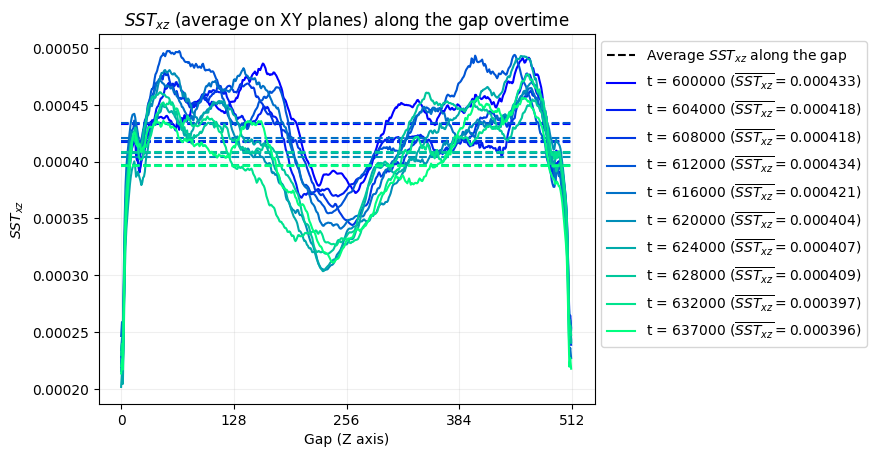

In [53]:
# SHEAR STRESS TENSOR TEST

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


direc = "/home/matti/DATA/Mayonese/staggered_run/SST_statistic/"

with open(direc+"sst_xx.dat", 'r') as f:
    SSTxx = np.loadtxt(f)
with open(direc+"sst_xy.dat", 'r') as f:
    SSTxy = np.loadtxt(f)
with open(direc+"sst_xz.dat", 'r') as f:
    SSTxz = np.loadtxt(f)
with open(direc+"sst_yy.dat", 'r') as f:
    SSTyy = np.loadtxt(f)
with open(direc+"sst_yz.dat", 'r') as f:
    SSTyz = np.loadtxt(f)
with open(direc+"sst_zz.dat", 'r') as f:
    SSTzz = np.loadtxt(f)
    
#col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
num = 10

if 0:
    rgb_colors = [(0,0,1), (0,1,0), (1,0,0)]
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", rgb_colors, N=256)
    gradient = np.linspace(0, 1, 256).reshape(1, 256)
    plt.imshow(gradient, aspect=10, cmap=custom_cmap)
    plt.axis('off')
    plt.title("Custom Colormap Preview")
    plt.show()

col = [cm.winter(i/(num-1)) for i in range(num)]
#col = [custom_cmap(i/(num-1)) for i in range(num)]

off = 600000
dt  = 1000
N   = len(SSTyz[:,0])
pl  = np.linspace(0,N-1,num, dtype=int)

plt.figure(1)
i=0
plt.plot([], [], ' ',linestyle='--', color='black', label=r'Average $SST_{xz}$ along the gap')
for j in pl:
    plt.plot(SSTxz[j,:], color=col[i], label=r"t = %d ($\overline{SST_{xz}}=%f$)"%(j*dt+off,np.average(SSTxz[j,:])))
    plt.hlines(np.average(SSTxz[j,:]), 0, 512, color=col[i], linestyle='--')
    i += 1
plt.xlabel("Gap (Z axis)")
plt.ylabel(r"$SST_{xz}$")
plt.xticks([0,128,256,128+256,512])
plt.title(r"$SST_{xz}$ (average on XY planes) along the gap overtime")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.2)